In [1]:
#Finding the turkey sound signature from pre-extracted audio features.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [3]:
train.head()

,audio_embedding,is_turkey,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",0,kDCk3hLIVXo,70,60
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",1,DPcGzqHoo7Y,40,30
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",1,7yM63MTHh5k,240,230
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",1,luG3RmUAxxM,520,510
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",0,PIm3cjxTpOk,10,0


In [4]:
train.tail()

,audio_embedding,is_turkey,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
1190,"[[90, 105, 224, 173, 117, 88, 119, 2, 219, 59,...",0,AKIWjFmAMt8,30,20
1191,"[[132, 154, 242, 164, 181, 58, 154, 63, 163, 4...",0,QTRCw0xn6uc,40,30
1192,"[[148, 8, 171, 123, 241, 91, 126, 154, 96, 246...",1,DbJJoQfo3kc,40,30
1193,"[[166, 13, 201, 135, 190, 93, 71, 30, 139, 151...",0,opqJ1SZmyGk,200,190
1194,"[[165, 45, 191, 96, 255, 87, 97, 77, 152, 215,...",0,aFHQY8eX5LI,40,30


In [5]:
train.shape

(1195, 5)

In [6]:
test.head()

,audio_embedding,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
0,"[[177, 20, 226, 132, 198, 81, 111, 59, 132, 18...",pyKh38FXD3E,10,0
1,"[[169, 21, 204, 161, 195, 72, 60, 39, 152, 184...",THhP1idrWXA,40,30
2,"[[165, 13, 198, 141, 199, 81, 173, 54, 119, 11...",jsw3T6GY2Nw,40,30
3,"[[167, 18, 188, 159, 198, 63, 156, 36, 179, 22...",nFkXTMHcjMU,24,14
4,"[[178, 32, 181, 100, 198, 46, 82, 83, 136, 227...",Au8g9kAlrLQ,40,30


In [7]:
test.shape

(1196, 4)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   audio_embedding                  1195 non-null   object
 1   is_turkey                        1195 non-null   int64 
 2   vid_id                           1195 non-null   object
 3   end_time_seconds_youtube_clip    1195 non-null   int64 
 4   start_time_seconds_youtube_clip  1195 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   audio_embedding                  1196 non-null   object
 1   vid_id                           1196 non-null   object
 2   end_time_seconds_youtube_clip    1196 non-null   int64 
 3   start_time_seconds_youtube_clip  1196 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.5+ KB


In [10]:
train_unique=train['vid_id'].unique()
test_unique = test['vid_id'].unique()
any(i in train_unique for i in test_unique)

False

Text(0.5, 1.0, 'Train data start and end time distribution')

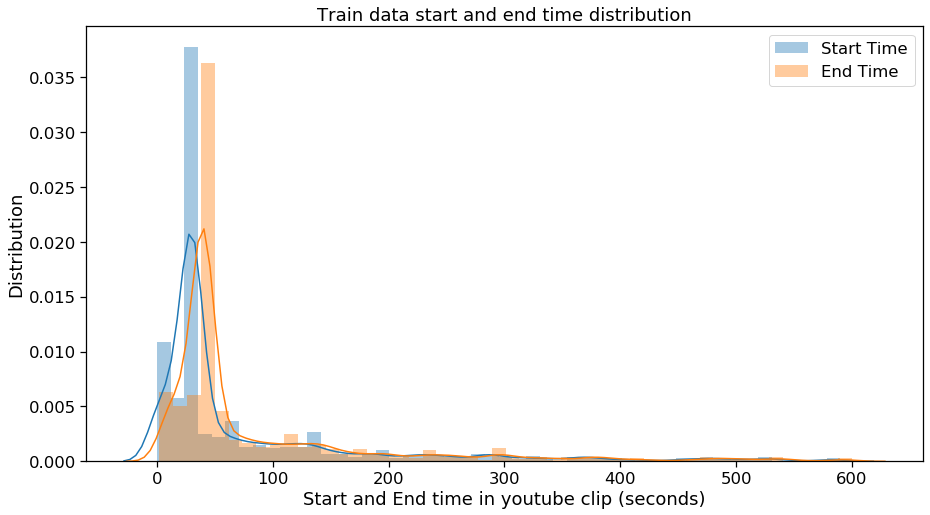

In [11]:
#Exploratory Data Analysis

plt.figure(figsize=(15,8))
sns.despine()
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
sns.distplot(train['start_time_seconds_youtube_clip'],label="Start Time")
sns.distplot(train['end_time_seconds_youtube_clip'],label="End Time")
plt.legend()
plt.xlabel('Start and End time in youtube clip (seconds)')
plt.ylabel('Distribution')
plt.title("Train data start and end time distribution")

In [12]:
train.describe()

,is_turkey,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
count,1195.000000,1195.000000,1195.000000
mean,0.410879,87.013389,77.085356
std,0.492199,107.750860,107.697523
min,0.000000,2.000000,0.000000
25%,0.000000,40.000000,30.000000
50%,0.000000,40.000000,30.000000
75%,1.000000,90.000000,80.000000
max,1.000000,600.000000,590.000000


In [13]:
test.describe()

,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
count,1196.000000,1196.000000
mean,94.307692,84.368729
std,121.050454,121.006595
min,2.000000,0.000000
25%,40.000000,30.000000
50%,40.000000,30.000000
75%,90.000000,80.000000
max,600.000000,590.000000


Text(0.5, 1.0, 'Test data start time distribution')

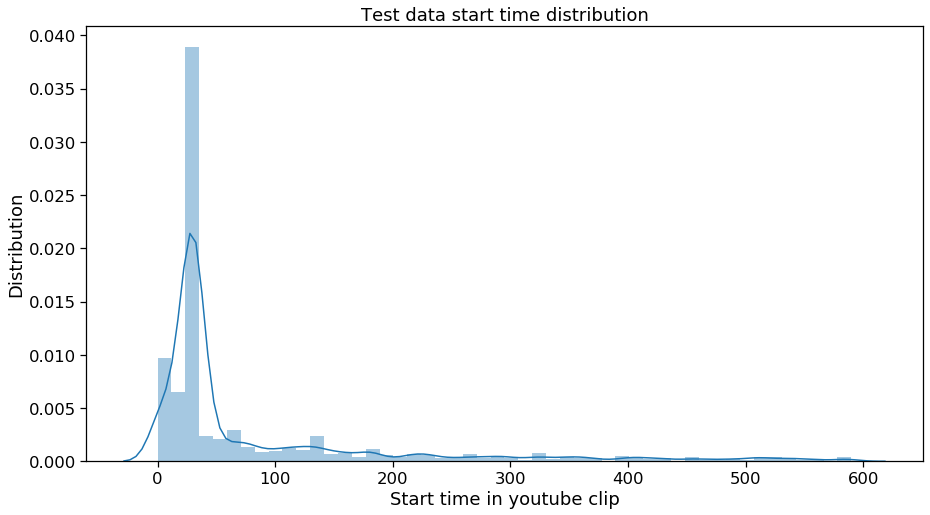

In [14]:
plt.figure(figsize=(15,8))
sns.despine()
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
sns.distplot(test['start_time_seconds_youtube_clip'])
plt.xlabel('Start time in youtube clip')
plt.ylabel('Distribution')
plt.title("Test data start time distribution")

Text(0.5, 1.0, 'Test data end time distribution')

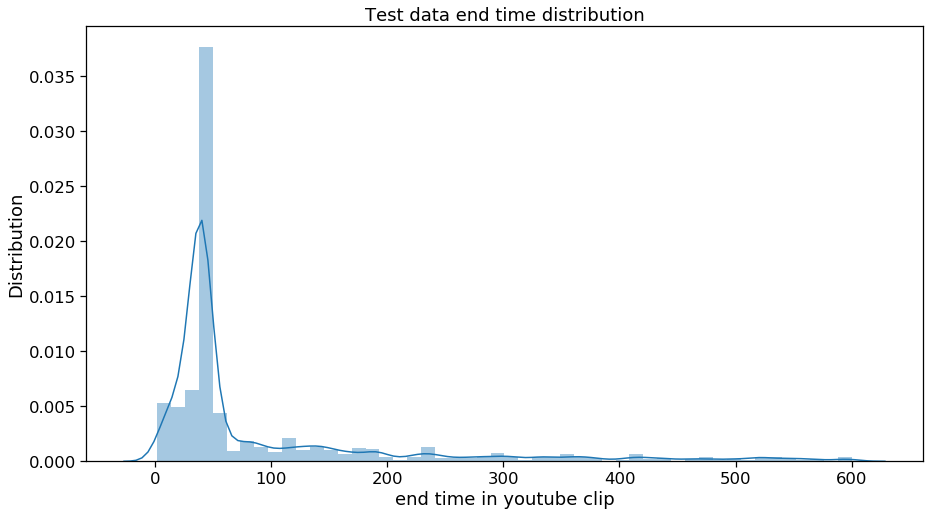

In [15]:
plt.figure(figsize=(15,8))
sns.despine()
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
sns.distplot(test['end_time_seconds_youtube_clip'])
plt.xlabel('end time in youtube clip')
plt.ylabel('Distribution')
plt.title("Test data end time distribution")

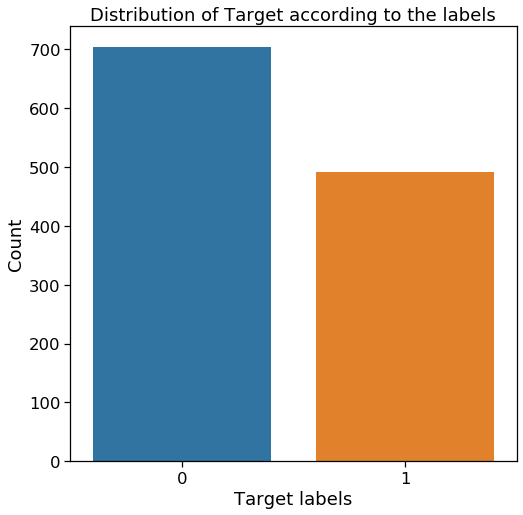

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='is_turkey',data=train)
plt.title('Distribution of Target according to the labels')
plt.xlabel('Target labels')
plt.ylabel('Count')
plt.show()

In [17]:
vid_train = []
for i in range(len(train.index)):
    a = pd.DataFrame(train.iloc[i,0])
    a['vid_id'] = train.iloc[i,2]
    vid_train.append(a)

vid_train_flatten = pd.concat(vid_train,axis=0)
vid_train_flatten.columns = ['feature_'+str(x) for x in vid_train_flatten.columns[:128]]+['vid_id']

In [18]:
vid_test = []
for i in range(len(test.index)):
    a = pd.DataFrame(test.iloc[i,0])
    a['vid_id'] = test.iloc[i,1]
    vid_test.append(a)

vid_test_flatten = pd.concat(vid_test,axis=0)
vid_test_flatten.columns = ['feature_'+str(x) for x in vid_test_flatten.columns[:128]]+['vid_id']

In [19]:
vid_train_flatten.shape

(11795, 129)

In [20]:
vid_test_flatten.shape

(11839, 129)

In [21]:
vid_train_flatten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11795 entries, 0 to 9
Columns: 129 entries, feature_0 to vid_id
dtypes: int64(128), object(1)
memory usage: 11.7+ MB


In [22]:
vid_test_flatten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11839 entries, 0 to 9
Columns: 129 entries, feature_0 to vid_id
dtypes: int64(128), object(1)
memory usage: 11.7+ MB


In [23]:
vid_test_flatten.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,vid_id
0,177,20,226,132,198,81,111,59,132,184,...,255,0,255,229,0,255,184,48,255,pyKh38FXD3E
1,168,19,221,138,219,88,161,77,120,182,...,255,0,255,255,0,255,36,95,255,pyKh38FXD3E
2,170,21,212,121,206,91,108,56,136,193,...,218,17,78,146,0,255,171,131,255,pyKh38FXD3E
3,171,22,216,137,201,90,108,62,131,187,...,227,0,255,140,19,255,201,38,255,pyKh38FXD3E
4,175,25,224,141,220,109,103,49,99,187,...,151,0,146,153,0,255,141,0,255,pyKh38FXD3E


In [24]:
df_train = pd.merge(train,vid_train_flatten,on='vid_id')
df_test = pd.merge(test,vid_test_flatten,on='vid_id')

df_train = df_train.drop(['audio_embedding'],axis=1)
df_test = df_test.drop(['audio_embedding'],axis=1)

In [25]:
df_train.shape

(11795, 132)

In [26]:
df_test.shape

(11839, 131)

In [27]:
a=abs(df_train.corr())['is_turkey'].sort_values(ascending=False)
a

is_turkey     1.000000
feature_2     0.606942
feature_3     0.589112
feature_19    0.585812
feature_24    0.553587
                ...   
feature_84    0.007793
feature_17    0.005367
feature_56    0.004935
feature_1     0.003921
feature_92    0.002011
Name: is_turkey, Length: 131, dtype: float64

In [28]:
len(a[a>0.4])

10

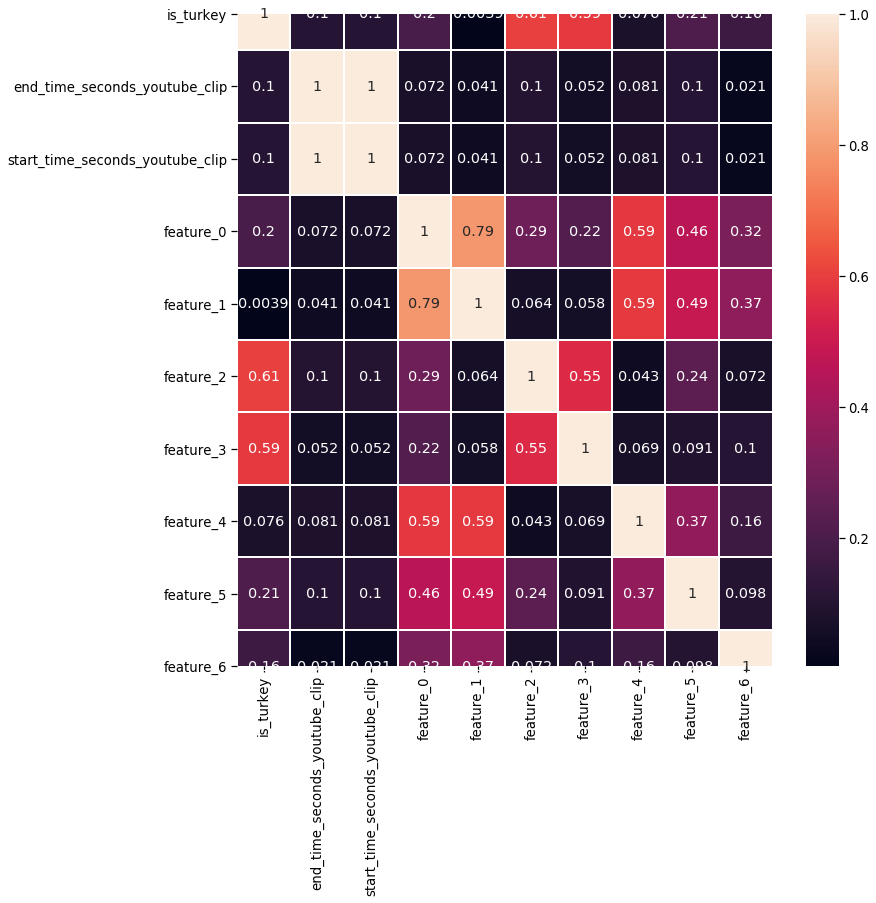

In [29]:
high_corr = pd.DataFrame(abs(df_train.corr()[:10]))
high_corr_square = high_corr[high_corr.columns[:10].tolist()]

sns.set_context("notebook",font_scale=1.2,rc={"lines.linewidth":2})
plt.figure(figsize=(12,12))
sns.heatmap(high_corr_square,linecolor='white',linewidths=1,annot=True)

In [30]:
high_corr

,is_turkey,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
is_turkey,1.000000,0.101862,0.101884,0.197014,0.003921,0.606942,0.589112,0.076136,0.206405,0.161479,...,0.111818,0.076500,0.152752,0.301644,0.183889,0.096375,0.120809,0.008799,0.071925,0.049985
end_time_seconds_youtube_clip,0.101862,1.000000,0.999995,0.072359,0.040841,0.100597,0.052337,0.080984,0.101653,0.021314,...,0.063738,0.021745,0.051009,0.020923,0.090581,0.020254,0.014654,0.004204,0.003353,0.047001
start_time_seconds_youtube_clip,0.101884,0.999995,1.000000,0.072270,0.040794,0.100517,0.052364,0.080972,0.101653,0.021336,...,0.063742,0.021788,0.050996,0.020934,0.090573,0.020280,0.014683,0.004262,0.003473,0.046962
feature_0,0.197014,0.072359,0.072270,1.000000,0.787887,0.286939,0.215628,0.587084,0.460120,0.317370,...,0.352675,0.210433,0.095938,0.124964,0.315565,0.188609,0.249263,0.042733,0.194579,0.576780
feature_1,0.003921,0.040841,0.040794,0.787887,1.000000,0.063962,0.057883,0.588196,0.491386,0.365096,...,0.388610,0.332268,0.041768,0.086171,0.362924,0.145450,0.140368,0.102961,0.249860,0.641665
feature_2,0.606942,0.100597,0.100517,0.286939,0.063962,1.000000,0.549047,0.042741,0.241654,0.071889,...,0.013170,0.069299,0.095412,0.289010,0.127651,0.178010,0.160921,0.016877,0.076759,0.009472
feature_3,0.589112,0.052337,0.052364,0.215628,0.057883,0.549047,1.000000,0.068651,0.090965,0.102375,...,0.153091,0.096046,0.110082,0.210837,0.149123,0.033861,0.139778,0.054272,0.000764,0.110582
feature_4,0.076136,0.080984,0.080972,0.587084,0.588196,0.042741,0.068651,1.000000,0.367843,0.159664,...,0.328558,0.272671,0.089828,0.011313,0.373871,0.225788,0.217902,0.154117,0.275260,0.483165
feature_5,0.206405,0.101653,0.101653,0.460120,0.491386,0.241654,0.090965,0.367843,1.000000,0.098088,...,0.333555,0.196000,0.028026,0.062280,0.302676,0.017309,0.127193,0.032980,0.006388,0.388373
feature_6,0.161479,0.021314,0.021336,0.317370,0.365096,0.071889,0.102375,0.159664,0.098088,1.000000,...,0.141924,0.155323,0.031431,0.144931,0.134855,0.117440,0.060674,0.057449,0.173194,0.201493


In [31]:
high_corr_square

,is_turkey,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
is_turkey,1.000000,0.101862,0.101884,0.197014,0.003921,0.606942,0.589112,0.076136,0.206405,0.161479
end_time_seconds_youtube_clip,0.101862,1.000000,0.999995,0.072359,0.040841,0.100597,0.052337,0.080984,0.101653,0.021314
start_time_seconds_youtube_clip,0.101884,0.999995,1.000000,0.072270,0.040794,0.100517,0.052364,0.080972,0.101653,0.021336
feature_0,0.197014,0.072359,0.072270,1.000000,0.787887,0.286939,0.215628,0.587084,0.460120,0.317370
feature_1,0.003921,0.040841,0.040794,0.787887,1.000000,0.063962,0.057883,0.588196,0.491386,0.365096
feature_2,0.606942,0.100597,0.100517,0.286939,0.063962,1.000000,0.549047,0.042741,0.241654,0.071889
feature_3,0.589112,0.052337,0.052364,0.215628,0.057883,0.549047,1.000000,0.068651,0.090965,0.102375
feature_4,0.076136,0.080984,0.080972,0.587084,0.588196,0.042741,0.068651,1.000000,0.367843,0.159664
feature_5,0.206405,0.101653,0.101653,0.460120,0.491386,0.241654,0.090965,0.367843,1.000000,0.098088
feature_6,0.161479,0.021314,0.021336,0.317370,0.365096,0.071889,0.102375,0.159664,0.098088,1.000000


In [32]:
high_corr.columns[:10].tolist()

['is_turkey',
 'end_time_seconds_youtube_clip',
 'start_time_seconds_youtube_clip',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6']

In [33]:
#Feature Engineering

df_train['duration']=df_train['end_time_seconds_youtube_clip']-df_train['start_time_seconds_youtube_clip']
df_test['duration']=df_test['end_time_seconds_youtube_clip']-df_test['start_time_seconds_youtube_clip']

In [34]:
train_columns = df_train.columns
test_columns = df_test.columns

df_train['all_feature_mean'] = df_train[train_columns[4:132]].mean(axis=1)
df_test['all_feature_mean'] = df_test[test_columns[4:132]].mean(axis=1)

df_train['all_feature_median'] = df_train[train_columns[4:132]].median(axis=1)
df_test['all_feature_median'] = df_test[test_columns[4:132]].median(axis=1)

df_train['all_feature_min'] = df_train[train_columns[4:132]].min(axis=1)
df_test['all_feature_min'] = df_test[test_columns[4:132]].min(axis=1)

df_train['all_feature_max'] = df_train[train_columns[4:132]].max(axis=1)
df_test['all_feature_max'] = df_test[test_columns[4:132]].max(axis=1)

df_train['all_feature_std'] = df_train[train_columns[4:132]].std(axis=1)
df_test['all_feature_std'] = df_test[test_columns[4:132]].std(axis=1)

In [35]:
df_train.drop('end_time_seconds_youtube_clip',axis=1,inplace=True)
df_test.drop('end_time_seconds_youtube_clip',axis=1,inplace=True)

In [36]:
df_train.head()

,is_turkey,vid_id,start_time_seconds_youtube_clip,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_124,feature_125,feature_126,feature_127,duration,all_feature_mean,all_feature_median,all_feature_min,all_feature_max,all_feature_std
0,0,kDCk3hLIVXo,60,172,34,216,110,208,46,95,...,255,129,4,255,10,122.148438,111.5,0,255,77.556796
1,0,kDCk3hLIVXo,60,171,39,199,121,238,62,59,...,255,126,188,255,10,126.578125,121.0,0,255,67.593459
2,0,kDCk3hLIVXo,60,169,33,200,97,210,22,73,...,234,205,33,255,10,126.414062,125.0,0,255,71.897513
3,0,kDCk3hLIVXo,60,180,39,218,118,213,73,80,...,255,103,153,255,10,132.000000,137.0,0,255,68.953368
4,0,kDCk3hLIVXo,60,166,31,204,134,211,59,62,...,255,58,177,255,10,126.132812,128.0,0,255,74.411219


In [37]:
df_test.head()

,vid_id,start_time_seconds_youtube_clip,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_124,feature_125,feature_126,feature_127,duration,all_feature_mean,all_feature_median,all_feature_min,all_feature_max,all_feature_std
0,pyKh38FXD3E,0,177,20,226,132,198,81,111,59,...,255,184,48,255,10,130.718750,128.0,0,255,89.022862
1,pyKh38FXD3E,0,168,19,221,138,219,88,161,77,...,255,36,95,255,10,135.671875,137.0,0,255,85.079871
2,pyKh38FXD3E,0,170,21,212,121,206,91,108,56,...,255,171,131,255,10,129.734375,128.0,0,255,71.774196
3,pyKh38FXD3E,0,171,22,216,137,201,90,108,62,...,255,201,38,255,10,134.054688,131.0,0,255,75.728827
4,pyKh38FXD3E,0,175,25,224,141,220,109,103,49,...,255,141,0,255,10,126.351562,124.5,0,255,84.582401


In [38]:
df_train_concat = df_train.groupby('vid_id').mean()
df_test_concat = df_test.groupby('vid_id').mean()

In [39]:
df_test_concat.head()

,start_time_seconds_youtube_clip,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_124,feature_125,feature_126,feature_127,duration,all_feature_mean,all_feature_median,all_feature_min,all_feature_max,all_feature_std
vid_id,,,,,,,,,,,,,,,,,,,,,
--sIMPsphRI,10.0,102.7,123.9,161.7,101.8,165.0,146.9,65.9,36.8,243.2,...,190.0,122.9,182.0,89.7,10.0,117.737500,116.05,0.0,255.0,79.365308
-0fOTY1jBhQ,40.0,50.8,103.3,171.7,45.2,189.5,111.5,109.2,145.5,207.8,...,110.9,47.4,99.3,171.2,10.0,129.797656,129.90,0.5,255.0,67.215658
-2S0mx876C8,13.0,95.0,127.0,182.6,49.0,177.7,87.0,100.8,136.3,233.9,...,173.8,184.0,153.6,116.0,10.0,122.122656,120.55,0.0,255.0,73.802439
-2TDIQvBy6s,30.0,15.8,139.3,90.2,65.0,94.4,84.1,173.1,146.3,206.8,...,157.6,228.7,178.9,121.7,10.0,125.812500,126.35,0.0,255.0,93.382582
-3Zm_4F5Og8,30.0,35.1,150.9,122.5,12.0,118.9,97.8,133.4,154.2,248.8,...,107.0,140.7,118.9,206.6,10.0,134.306250,135.90,0.0,255.0,88.072744


In [40]:
df_test_concat.shape

(1196, 135)

In [41]:
X=df_train_concat.drop(['is_turkey'],axis=1)
y=df_train_concat['is_turkey']

In [42]:
X.shape

(1195, 135)

In [43]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import roc_curve,auc,roc_auc_score


def cross_validation(train_set,target,test_set,nfold,cv_type,seed,shuf,model):
    
    if cv_type=="KFold":
        kf = KFold(n_split = nfold,random_state = seed,shuffle=shuf)
        split = kf.split(train_set)
    else:
        kf = StratifiedKFold(n_splits = nfold,shuffle=shuf,random_state=seed)
        split = kf.split(train_set,target)
        
    oof_preds = np.zeros(train_set.shape[0])
    oof_test = np.zeros(test_set.shape[0])
    
    for i, (train_index,val_index) in enumerate(split):
        x_tr,x_val = train_set.iloc[train_index],train_set.iloc[val_index]
        y_tr,y_val = target[train_index],target[val_index]
        
        params = {'random_state':seed}
        model.set_params(**params)
        model.fit(x_tr,y_tr)
        oof_preds[val_index] = model.predict_proba(x_val)[:,1]
        oof_test+=model.predict_proba(test_set)[:,1]/kf.n_splits
        print("Fold %s ROC: " %str(i+1),np.round(roc_auc_score(y_val,(oof_preds[val_index])),5))
        
    print("CV Score: ",np.round(roc_auc_score(target,oof_preds),5))
    return oof_preds.reshape(-1,1),oof_test.reshape(-1,1)

In [44]:
#model building

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=160,min_samples_split=3,n_jobs=-1)
oof_train_rf,oof_test_rf = cross_validation(train_set=X,target=y,test_set = df_test_concat,cv_type="SKFold",nfold=5,seed=2020,shuf=True,model=rfc)

Fold 1 ROC:  0.98032
Fold 2 ROC:  0.99262
Fold 3 ROC:  0.98068
Fold 4 ROC:  0.99642
Fold 5 ROC:  0.98373
CV Score:  0.98602


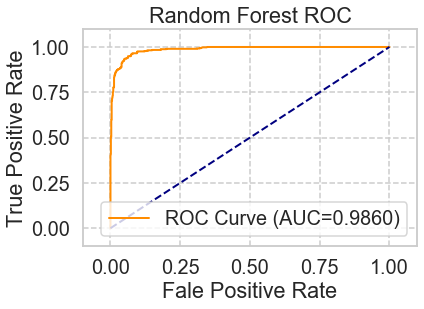

In [45]:
fpr,tpr,thresholds = roc_curve(y,oof_train_rf)
roc_auc = auc(fpr,tpr)

sns.set('talk','whitegrid','dark',font_scale=1.2,rc={"lines.linewidth":2,'grid.linestyle':'--'})
lw = 2
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=lw,label="ROC Curve (AUC=%0.4f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw = lw,linestyle='--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('Fale Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

In [46]:
y_pred_proba_RFC = oof_test_rf
y_pred_proba_RFC=pd.DataFrame(y_pred_proba_RFC,columns=['is_turkey'])
df_test_concat.reset_index(inplace=True)
df_test_concat['is_turkey']=y_pred_proba_RFC['is_turkey']
df_sub = df_test_concat[['vid_id','is_turkey']]
df_test_concat.drop('is_turkey',axis=1,inplace=True)

sample = pd.read_csv('sample_submission.csv')
df_final_RFC = pd.merge(sample,df_sub,on='vid_id')
df_final_RFC.drop('is_turkey_x',axis=1,inplace=True)
df_final_RFC.columns = ['vid_id','is_turkey']

df_final_RFC.to_csv('submission_RFC.csv',index=False)
df_test_concat.set_index('vid_id',inplace=True)

In [47]:
y_pred_proba_RFC

,is_turkey
0,0.583187
1,0.702667
2,0.581813
3,0.915833
4,0.973333
...,...
1191,0.001667
1192,0.755125
1193,0.095125
1194,0.008958


In [48]:
# XGBoost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3,learning_rate=0.07,n_estimators=110,n_jobs=-1)
oof_train_xgb,oof_test_xgb = cross_validation(train_set=X,target=y,test_set=df_test_concat,cv_type="SKFold",nfold=5,seed=2020,shuf=True,model=xgb)

Fold 1 ROC:  0.98343
Fold 2 ROC:  0.99081
Fold 3 ROC:  0.98278
Fold 4 ROC:  0.99776
Fold 5 ROC:  0.9847
CV Score:  0.98667


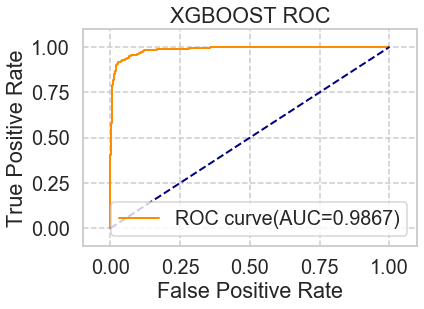

In [49]:
fpr,tpr,thresholds = roc_curve(y,oof_train_xgb)
roc_auc = auc(fpr,tpr)

sns.set('talk','whitegrid','dark',font_scale=1.2,rc={"lines.linewidth":2,"grid.linestyle":"--"})
lw = 2
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve(AUC=%0.4f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBOOST ROC')
plt.legend(loc="lower right")
plt.show()

In [50]:
y_pred_proba_XGB=oof_test_xgb
y_pred_proba_XGB=pd.DataFrame(y_pred_proba_XGB,columns=['is_turkey'])
df_test_concat.reset_index(inplace=True)
df_test_concat['is_turkey']=y_pred_proba_XGB['is_turkey']

df_sub = df_test_concat[['vid_id','is_turkey']]
df_test_concat.drop('is_turkey',axis=1,inplace=True)

df_final_XGB = pd.merge(sample,df_sub,on='vid_id')
df_final_XGB.drop('is_turkey_x',axis=1,inplace=True)
df_final_XGB.columns = ['vid_id','is_turkey']

df_final_XGB.to_csv('submission_XGB.csv',index=False)
df_test_concat.set_index('vid_id',inplace=True)

In [53]:
df_test_concat

,start_time_seconds_youtube_clip,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_124,feature_125,feature_126,feature_127,duration,all_feature_mean,all_feature_median,all_feature_min,all_feature_max,all_feature_std
vid_id,,,,,,,,,,,,,,,,,,,,,
--sIMPsphRI,10.0,102.7,123.9,161.7,101.8,165.0,146.9,65.9,36.8,243.2,...,190.0,122.9,182.0,89.7,10.0,117.737500,116.05,0.0,255.0,79.365308
-0fOTY1jBhQ,40.0,50.8,103.3,171.7,45.2,189.5,111.5,109.2,145.5,207.8,...,110.9,47.4,99.3,171.2,10.0,129.797656,129.90,0.5,255.0,67.215658
-2S0mx876C8,13.0,95.0,127.0,182.6,49.0,177.7,87.0,100.8,136.3,233.9,...,173.8,184.0,153.6,116.0,10.0,122.122656,120.55,0.0,255.0,73.802439
-2TDIQvBy6s,30.0,15.8,139.3,90.2,65.0,94.4,84.1,173.1,146.3,206.8,...,157.6,228.7,178.9,121.7,10.0,125.812500,126.35,0.0,255.0,93.382582
-3Zm_4F5Og8,30.0,35.1,150.9,122.5,12.0,118.9,97.8,133.4,154.2,248.8,...,107.0,140.7,118.9,206.6,10.0,134.306250,135.90,0.0,255.0,88.072744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zZGZwDOL-eY,0.0,160.4,10.5,192.3,125.0,207.9,101.2,82.9,86.5,160.6,...,219.9,128.5,80.2,255.0,10.0,133.786719,132.40,0.0,255.0,72.422757
ztdlQF4TVpg,30.0,77.8,114.8,176.4,29.6,107.7,122.1,73.3,80.2,248.0,...,126.5,121.8,94.5,124.8,10.0,117.819531,112.80,0.0,255.0,83.012594
zv1ySnEmWwY,30.0,168.4,11.2,179.7,109.7,177.6,78.9,84.1,44.5,207.9,...,142.6,194.7,155.9,255.0,10.0,127.078906,124.15,0.0,255.0,78.479521


In [54]:
# LightGBM Classifier

from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(max_depth=-1,n_estimators=75,num_leaves=31,n_jobs=-1)
oof_train_lgb,oof_test_lgb = cross_validation(train_set=X,target=y,test_set=df_test_concat,cv_type="SKFold",nfold=5,seed=2014,shuf=True,model=lgbc)

Fold 1 ROC:  0.99334
Fold 2 ROC:  0.99479
Fold 3 ROC:  0.98321
Fold 4 ROC:  0.98611
Fold 5 ROC:  0.98095
CV Score:  0.98748


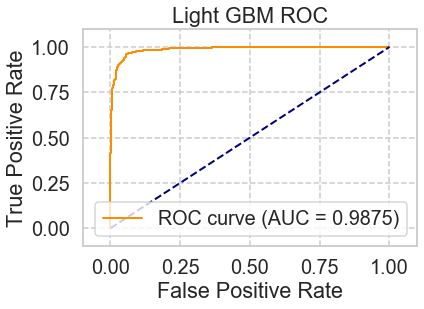

In [55]:
fpr, tpr, thresholds = roc_curve(y,oof_train_lgb)
roc_auc = auc(fpr, tpr)

sns.set('talk', 'whitegrid', 'dark', font_scale=1.2,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM ROC')
plt.legend(loc="lower right")
plt.show()

In [56]:
y_pred_proba_LGBC = oof_test_lgb
y_pred_proba_LGBC = pd.DataFrame(y_pred_proba_LGBC,columns=['is_turkey'])
df_test_concat.reset_index(inplace=True)
df_test_concat['is_turkey'] = y_pred_proba_LGBC['is_turkey']
df_sub = df_test_concat[['vid_id','is_turkey']] 
df_test_concat.drop('is_turkey',axis=1,inplace=True)

df_final_LGBC = pd.merge(sample,df_sub,on='vid_id')
df_final_LGBC.drop('is_turkey_x',axis=1,inplace=True)
df_final_LGBC.columns = ['vid_id', 'is_turkey']

df_final_LGBC.to_csv('submission_LGBM.csv',index=False)
df_test_concat.set_index('vid_id',inplace=True)

In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.00001,penalty='l2',solver='sag',max_iter=100,n_jobs=-1)
oof_train_lr,oof_test_lr = cross_validation(train_set=X,target=y,test_set=df_test_concat,cv_type="SKFold",nfold=5,seed=2018,shuf=True,model=LR)

Fold 1 ROC:  0.99602
Fold 2 ROC:  0.98799
Fold 3 ROC:  0.989
Fold 4 ROC:  0.98212
Fold 5 ROC:  0.98939
CV Score:  0.98887


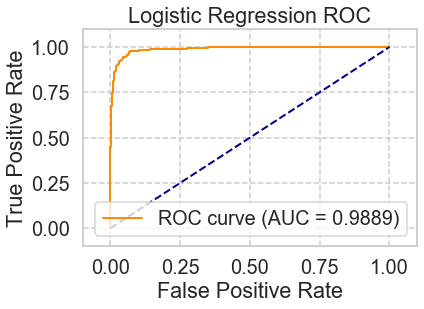

In [58]:
fpr, tpr, thresholds = roc_curve(y,oof_train_lr)
roc_auc = auc(fpr, tpr)

sns.set('talk', 'whitegrid', 'dark', font_scale=1.2,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

In [59]:
y_pred_proba_LR =  oof_test_lr
y_pred_proba_LR = pd.DataFrame(y_pred_proba_LR,columns=['is_turkey'])
df_test_concat.reset_index(inplace=True)
df_test_concat['is_turkey'] = y_pred_proba_LR['is_turkey']
df_sub = df_test_concat[['vid_id','is_turkey']] 
df_test_concat.drop('is_turkey',axis=1,inplace=True)

df_final_LR = pd.merge(sample,df_sub,on='vid_id')
df_final_LR.drop('is_turkey_x',axis=1,inplace=True)
df_final_LR.columns = ['vid_id', 'is_turkey']

df_final_LR.to_csv('submission_LR.csv',index=False)
df_test_concat.set_index('vid_id',inplace=True)

In [60]:
#Blending
def roc_min_func(weights):
    final_prediction = 0
    for weight,prediction in zip(weights,blend_train):
        final_prediction+=weight*prediction
    return roc_auc_score(y,final_prediction)
from scipy.optimize import minimize

In [61]:
blend_train = []
blend_train.append(oof_train_rf)
blend_train.append(oof_train_xgb)
blend_train.append(oof_train_lgb)
blend_train.append(oof_train_lr)
blend_train = np.array(blend_train)

print('\n Finding the weights...')
res_list = []
weight_list = []
for k in range(500):
    starting_values=np.random.uniform(size=len(blend_train))
    bounds = [(0,1)]*len(blend_train)
    res = minimize(roc_min_func,starting_values,method='L-BFGS-B',bounds=bounds,options={'disp':False,'maxiter':100000})
    res_list.append(res['fun'])
    weight_list.append(res['x'])
    print('{iter}\tScore: {score}\tWeights: {Weights}'.format(iter=(k+1),score=res['fun'],Weights = '\t'.join([str(item) for item in res['x']])))
    bestSC = np.max(res_list)
    bestWght = weight_list[np.argmax(res_list)]
    weights = bestWght
    blend_score=round(bestSC,6)
    
    print('\n Ensemble Score: {best_score}'.format(best_score=bestSC))
    print('\n Best Weights: {weights}'.format(weights=bestWght))
    print('\n Blend Score:',blend_score)


 Finding the weights...
1	Score: 0.9887636548787262	Weights: 0.635006599344014	0.01887518631564422	0.7218979849840729	0.2785950255499403

 Ensemble Score: 0.9887636548787262

 Best Weights: [0.6350066  0.01887519 0.72189798 0.27859503]

 Blend Score: 0.988764
2	Score: 0.9890703110535086	Weights: 0.9278747696838974	0.8983401206847867	0.7548662047962185	0.9802729300372963

 Ensemble Score: 0.9890703110535086

 Best Weights: [0.92787477 0.89834012 0.7548662  0.98027293]

 Blend Score: 0.98907
3	Score: 0.9887665478615071	Weights: 0.6911677190102359	0.4345410950076821	0.08046100214408225	0.5363173822409334

 Ensemble Score: 0.9890703110535086

 Best Weights: [0.92787477 0.89834012 0.7548662  0.98027293]

 Blend Score: 0.98907
4	Score: 0.9889140899833364	Weights: 0.25341552485759933	0.9618869106019189	0.31322246140758425	0.6084593974291211

 Ensemble Score: 0.9890703110535086

 Best Weights: [0.92787477 0.89834012 0.7548662  0.98027293]

 Blend Score: 0.98907
5	Score: 0.9888938391038696	Wei

37	Score: 0.9889198759488984	Weights: 0.9369475234277654	0.15592502683928633	0.6976487273410362	0.5756479251038872

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
38	Score: 0.9890645250879466	Weights: 0.5189225141527393	0.13503443832987072	0.4545158281947118	0.4310125972915513

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
39	Score: 0.9881069477874468	Weights: 0.006573752505746211	0.7513455793830057	0.19276578030034164	0.15077851108227935

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
40	Score: 0.9882689548231809	Weights: 0.9901485243872447	0.12200007980971395	0.009646396885997222	0.4374789070485193

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
41	Score: 0.9886942232919829	Weights: 0.503

75	Score: 0.9891860303647473	Weights: 0.33534477120804695	0.6781397923808915	0.5767935567620376	0.6475073719071018

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
76	Score: 0.9887000092575449	Weights: 0.2125538617733712	0.8409128076835992	0.6285245990847227	0.31047638882403894

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
77	Score: 0.989125277726347	Weights: 0.7366137359945335	0.638418389540987	0.25598704239152326	0.9391533208833815

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
78	Score: 0.9891137057952231	Weights: 0.1951936113840792	0.16964584110605363	0.3627209115808552	0.24135705733534296

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
79	Score: 0.9883094565821144	Weights: 0.901008200

115	Score: 0.9895331882984632	Weights: 0.36606378649082205	0.19491271248645714	0.7963344957117898	0.9910386935054395

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
116	Score: 0.9890876689501944	Weights: 0.13891636131008478	0.1327397917584866	0.9363681793963503	0.31226832976352903

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
117	Score: 0.9886103267913349	Weights: 0.9488327147484882	0.3262697058852263	0.5525917365435	0.3545580432208314

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
118	Score: 0.988679758378078	Weights: 0.9322305962545454	0.008216293076684922	0.6376949488334106	0.34260048647367813

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
119	Score: 0.9887260461025735	Weights: 0.4967

 Blend Score: 0.989533
152	Score: 0.9891542075541566	Weights: 0.8855174636760843	0.3510679498767374	0.3433509530280525	0.8927037975950393

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
153	Score: 0.9887607618959452	Weights: 0.9808654184043001	0.3055997079351307	0.6942099931037986	0.45611966732976983

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
154	Score: 0.9884164969450102	Weights: 0.4940822006630594	0.9637250944679171	0.5544629384737244	0.20723211542030306

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
155	Score: 0.9888562303277171	Weights: 0.35335088619092603	0.8284734961489996	0.03682509500680253	0.6047960230273364

 Ensemble Score: 0.9895331882984633

 Best Weights: [0.06559746 0.15068028 0.42521356 0.95475855]

 Blend Score: 0.989533
156	Score: 0.98927281

194	Score: 0.9893017496759859	Weights: 0.7060467087030405	0.06241797957854389	0.7432678251555322	0.7687158282936468

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
195	Score: 0.9879102249583411	Weights: 0.8030155048938542	0.8673169530157624	0.41041405227329963	0.03948942593730309

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
196	Score: 0.9883094565821143	Weights: 0.6413804687801021	0.9000100133050307	0.3929695807783282	0.23144005039089188

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
197	Score: 0.9880375162007036	Weights: 0.03441701182902046	0.6919175218614122	0.9881577183535353	0.005753507420878989

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
198	Score: 0.9885640390668394	Weights: 0.

234	Score: 0.9883991390483244	Weights: 0.5966358716550405	0.6977955893596942	0.12637425767006139	0.3430449611469314

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
235	Score: 0.9893191075726717	Weights: 0.4992705315275867	0.12323987935081326	0.2331379222817358	0.7174453206217075

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
236	Score: 0.9893393584521384	Weights: 0.15490822548630712	0.5387406083775601	0.5776846356425794	0.9444358545888444

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
237	Score: 0.988422282910572	Weights: 0.5194184107597711	0.9287941791179712	0.2351918045663366	0.3577588166257516

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
238	Score: 0.9884656776522865	Weights: 0.45388

273	Score: 0.9885061794112201	Weights: 0.7359523196227398	0.46090476235396727	0.20168992768472072	0.3251691970809588

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
274	Score: 0.9894695426772819	Weights: 0.45691542884132164	0.17180700308754393	0.3464588158853067	0.86606428456701

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
275	Score: 0.9883268144788002	Weights: 0.320847172227423	0.4196137347348752	0.9240276011761188	0.08192217814317082

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
276	Score: 0.9892004952786522	Weights: 0.38963551608808034	0.5438690249112772	0.6048947452390232	0.7278734049198023

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
277	Score: 0.989119491760785	Weights: 0.57839

315	Score: 0.9881185197185705	Weights: 0.994494723849083	0.36162037014386983	0.9254387811220307	0.03182373544525752

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
316	Score: 0.9880490881318275	Weights: 0.25535079910601466	0.0835440219952005	0.7239844821442253	0.007276077569009276

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
317	Score: 0.9880982688391038	Weights: 0.9028103280686124	0.540422640176828	0.6661258009003973	0.03235684622953994

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
318	Score: 0.9882168811331234	Weights: 0.5396110094425618	0.6016917706254125	0.06944754489028993	0.20832498103782926

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
319	Score: 0.9880982688391038	Weights: 0.0

355	Score: 0.9889256619144603	Weights: 0.8359323763330955	0.12051040728187079	0.6815926731889598	0.504360423865088

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
356	Score: 0.989032702277356	Weights: 0.5779592676877456	0.5132338571220908	0.9093972831730581	0.5935047614565419

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
357	Score: 0.9893653952971673	Weights: 0.20688352459138515	0.023074363768913364	0.1528892054893357	0.9811677514220808

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
358	Score: 0.9890298092945751	Weights: 0.1312861653385483	0.26322259876142273	0.3877944442821465	0.21159651826878068

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
359	Score: 0.9888851601555267	Weights: 0.600

395	Score: 0.989460863728939	Weights: 0.3607484422120011	0.32071071574053134	0.683182399840593	0.9214092138428805

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
396	Score: 0.9880577670801703	Weights: 0.6511584178759757	0.9707918803211599	0.3322633238558943	0.15926933321116277

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
397	Score: 0.98781764950935	Weights: 0.25466626583353247	0.6811506104243531	0.2734512340778634	0.01472721762788709

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
398	Score: 0.9895360812812442	Weights: 0.3714676573217587	0.18129216363999856	0.6166226794742529	0.9123958836600204

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
399	Score: 0.9892265321236808	Weights: 0.932507

432	Score: 0.9885900759118682	Weights: 0.8150607731177916	0.23672034062751468	0.7110787082899768	0.22400436565304138

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
433	Score: 0.9879709775967414	Weights: 0.518944739315032	0.5211144011105924	0.4414354509067959	0.009497414351326339

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
434	Score: 0.9882053092019998	Weights: 0.8051593669340931	0.8616690238674959	0.27508028130179396	0.24695181680495404

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
435	Score: 0.9890182373634511	Weights: 0.9170442740718884	0.9508322658870579	0.671922224572409	0.9076477222302327

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
436	Score: 0.9889488057767081	Weights: 0.377

468	Score: 0.9881503425291613	Weights: 0.7290795051679982	0.7499693212446814	0.37627843369579683	0.12818567749646947

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
469	Score: 0.9895071514534346	Weights: 0.26259638587739254	0.04807851616377112	0.5182984213560522	0.6389847578980344

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
470	Score: 0.9891165987780041	Weights: 0.5401954615401432	0.5887300332311987	0.6725379206519984	0.6805798570023165

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
471	Score: 0.9886624004813923	Weights: 0.5131698286117412	0.8893716658071552	0.581590916681478	0.38864523548412744

 Ensemble Score: 0.9895650111090539

 Best Weights: [0.16277151 0.0397184  0.40268554 0.76808118]

 Blend Score: 0.989565
472	Score: 0.9888157285687835	Weights: 0.456

In [62]:
df_corr = pd.DataFrame()
df_corr['LGBC'] = df_final_LGBC['is_turkey']
df_corr['XGB'] = df_final_XGB['is_turkey']
df_corr['RFC'] = df_final_RFC['is_turkey']
df_corr['LR'] = df_final_LR['is_turkey']
df_corr.corr()

,LGBC,XGB,RFC,LR
LGBC,1.000000,0.996052,0.967726,0.974475
XGB,0.996052,1.000000,0.975945,0.980069
RFC,0.967726,0.975945,1.000000,0.977382
LR,0.974475,0.980069,0.977382,1.000000


In [63]:
W_RFC = 0.05
W_XGB = 0.1
W_LGB = 0.4
W_LR = 0.45

fpr_rfc,tpr_rfc,threshold_rfc = roc_curve(y,oof_train_rf)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)

fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y,oof_train_xgb)
roc_auc_xgb = auc(fpr_xgb,tpr_xgb)

fpr_lgb,tpr_lgb,threshold_lgb = roc_curve(y,oof_train_lgb)
roc_auc_lgb = auc(fpr_lgb,tpr_lgb)

fpr_lr,tpr_lr,threshold_lr = roc_curve(y,oof_train_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

final_roc_score = (W_RFC*auc(fpr_rfc,tpr_rfc)+W_XGB*auc(fpr_xgb,tpr_xgb)+W_LGB*auc(fpr_lgb,tpr_lgb)+W_LR*auc(fpr_lr,tpr_lr))

print("Random Forest Score: ",roc_auc_rfc)
print("XG Boost Score:      ",roc_auc_xgb)
print("Light GBM:           ",roc_auc_lgb)
print("Logistic Regression: ",roc_auc_lr)
print("Blend Score:         ",final_roc_score)

Random Forest Score:  0.9860153212368079
XG Boost Score:       0.9866749213108683
Light GBM:            0.9874849564895389
Logistic Regression:  0.9888706952416219
Blend Score:          0.9879540536474727


In [64]:
df_final_blend = df_final_LGBC
df_final_blend['is_turkey']=W_LGB*df_final_LGBC['is_turkey']+W_XGB*df_final_XGB['is_turkey']+W_RFC*df_final_RFC['is_turkey']+W_LR*df_final_LR['is_turkey']
df_final_blend.to_csv('submission_blend.csv',index = False)